In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#import dataset in collab
uploaded=files.upload()# This will prompt you to choose the CSV file
# The uploaded file is stored in a dictionary; get the filename dynamically
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

print(df)

Saving data.csv to data.csv
          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders

In [8]:
#1. Load the dataset & explore
# Check first 5 rows
print(df.head(5))
# Summary info
print(df.info())
# Statistical summary
print(df.describe())
#.head() → see the first few rows.
#.info() → tells you column names, non-null values, and data types.
#.describe() → gives numerical stats like mean, std, min, max.

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [9]:
#2. Check data types, drop & rename columns
df = df.drop(columns=["Engine Fuel Type", "Market Category",
                      "Vehicle Style", "Popularity",
                      "Number of Doors", "Vehicle Size"])
df = df.rename(columns={
    "Engine HP": "HP",
    "Engine Cylinders": "Cylinders",
    "Transmission Type": "Transmission",
    "Driven_Wheels": "Drive Mode",
    "highway MPG": "MPG-H",
    "city mpg": "MPG-C",
    "MSRP": "Price"
})
#Dropping irrelevant columns reduces noise.

#Renaming makes features easier to read and work with.

In [10]:
#3. Drop duplicate rows
print("Before removing duplicates:", df.shape)
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)
#Duplicates give misleading results in training/testing or analysis.

Before removing duplicates: (11914, 10)
Duplicate rows: 989
After removing duplicates: (10925, 10)


In [11]:
#4. Handle missing values
#a) Check missing values
print(df.isnull().sum())
#b) Remove rows with null values
df = df.dropna()
print("After removing null values:", df.shape)
#Nulls can affect calculations. In real projects, sometimes we impute missing values (mean/median), but here we simply drop them.

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
After removing null values: (10827, 10)


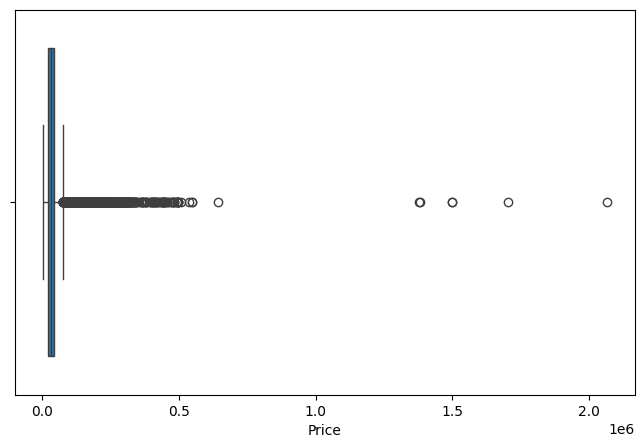

IQR: 21327.5
Number of outliers: 936


In [14]:
#5. Detect Outliers (Price Attribute)
#a) Boxplot of Price
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price"])
plt.show()
#b) Calculate IQR (Interquartile Range)
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

print("IQR:", IQR)

# Outlier range
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count outliers
outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])
#Outliers are extreme values that distort averages. IQR is a standard statistical method to detect them.

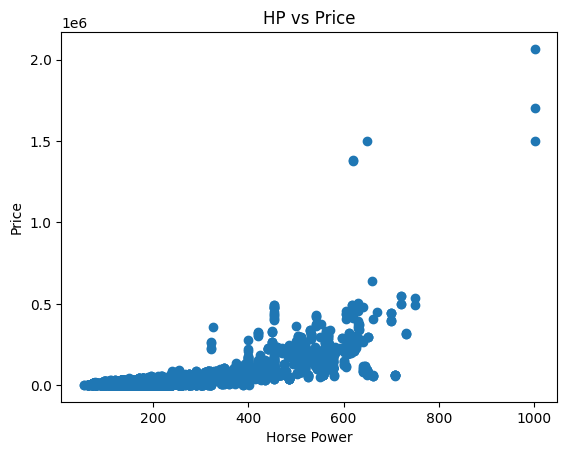

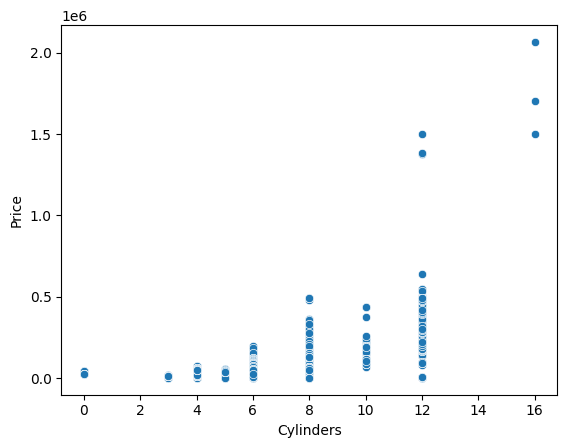

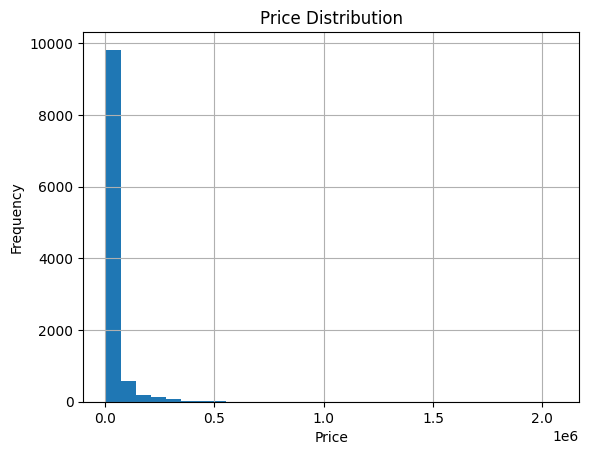

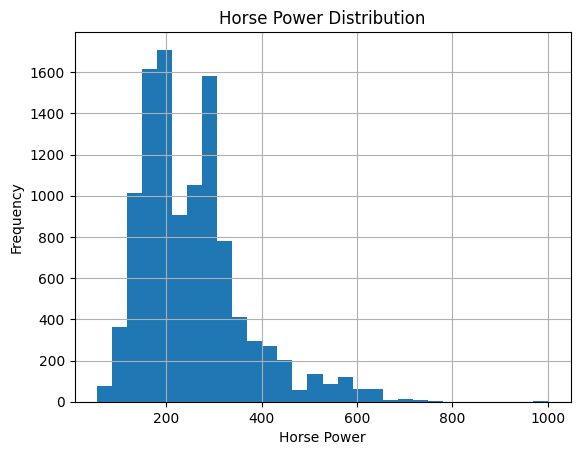

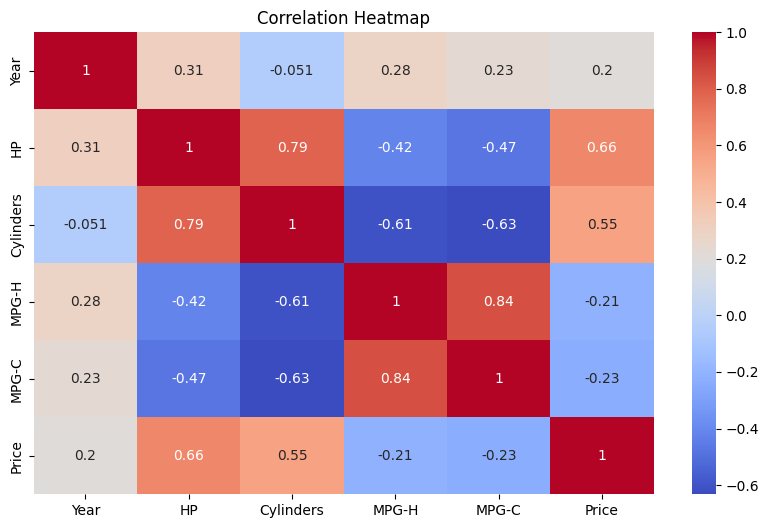

In [18]:
#6. Visualization
#a) Scatter plots (relationships between features)
plt.scatter(df["HP"], df["Price"])
plt.xlabel("Horse Power")
plt.ylabel("Price")
plt.title("HP vs Price")
plt.show()

sns.scatterplot(x="Cylinders", y="Price", data=df)
plt.show()

#b) Histograms (frequency distribution)
df["Price"].hist(bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

df["HP"].hist(bins=30)
plt.xlabel("Horse Power")
plt.ylabel("Frequency")
plt.title("Horse Power Distribution")
plt.show()
#c) Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

#Scatter plot → relationship between two features.

#Histogram → distribution of one feature.

#Heatmap → correlation between all numerical features.